# Procesos Gaussianos



## Técnicas para construir kernels

- En general, un kernel puede entenderse como la extensión del producto interno en un espacio de Hilbert con núcleo reproductivo (Reproducing Kernel Hilbert Space-RKHS):

$$ \kappa(x,x') = \langle \phi(x), \phi(x')\rangle_\mathscr{H} $$

- $x \in \mathbb{R}^P$ y $\phi : \mathbb{R}^P \to \mathbb{R}^Q$, tal que $Q\to \infty$.

- Además, dados dos kernels $\kappa_1(x,x')$ y $\kappa_2(x,x')$, las siguientes combinaciones generan kernels validos:


$\kappa(x,x') = c \kappa_1(x,x') $

$\kappa(x,x') = f(x)\kappa_1(x,x')f(x')$

$\kappa(x,x') = g(\kappa_1(x,x'))$

$\kappa(x,x') = \exp(\kappa_1(x,x'))$

$\kappa(x,x') = \kappa_1(x,x')+\kappa_2(x,x')$

$\kappa(x,x') = \kappa_1(x,x')\kappa_2(x,x')$

$\kappa(x,x') = \kappa_3(\varphi(x),\varphi(x'))$

$\kappa(x,x') = x^\top A {x'}$



- $c\in\mathbb{R}^+$, $f(\cdot)$ es cualquier función, $g(\cdot)$ es un polinomio con coeficientes positivos, $\kappa_3(\cdot,\cdot)$ es un kernel valido, $A$ es una matriz semidefinida positiva.

## Métodos kernel sobre esquema Bayesiano

- Los Procesos Gaussianos (Gaussian Process - GPs) extienden el método parámetrico para definir la incertidumbre de los parámetros del regresor al imponer un prior sobre funciones directamente en RKHS.

- En general, los métodos como [ARMA](https://en.wikipedia.org/wiki/Autoregressive_moving-average_model) (autoregressive moving average), Kalman filter, y redes de base radial, pueden explicarse como casos particularles de GPs.

- Un GP es un conjunto de variables aleatorias con probabilidad conjunta Gaussiana.

- EL GP se define completamente por su media $m(\mathbf{x})$ y su covarianza $\kappa(\mathbf{x},\mathbf{x}')$ desde una función $f(\mathbf{x})\in\mathbb{R}$, con $f(\mathbf{x})=\phi(\mathbf{x})^\top \mathbf{w}$; $\mathbf{w}\sim \mathscr{N}(\mathbf{w}|\mathbf{0},\mathbf{\Sigma_w})$; $\mathbf{\Sigma_w}\in\mathbb{R}^{Q \times Q}$; $\phi:\mathbb{R}^P\to\mathbb{R}^Q,$ tal que:



$m(\mathbf{x})=\mathbb{E}\{f(\mathbf{x})\} = \mathbb{E}\{\phi(\mathbf{x})^\top \mathbf{w}\}= \phi(\mathbf{x})^\top \mathbb{E}\{\mathbf{w}\} = 0$

$\kappa(\mathbf{x},\mathbf{x}') = cov(f(\mathbf{x}),f(\mathbf{x}')) = \mathbb{E}\{f(\mathbf{x})f(\mathbf{x}')\} = \mathbb{E}\{\phi(\mathbf{x})^\top \mathbf{w}\mathbf{w}^\top\phi^\top(\mathbf{x}')\} = \phi(\mathbf{x})^\top \mathbb{E}\{\mathbf{w}\mathbf{w}^\top\}\phi(\mathbf{x}') = \phi(\mathbf{x})^\top \mathbf{\Sigma_w}\phi(\mathbf{x}')$

- $f \sim \mathscr{GP}(f|\mathbf{0},\mathbf{K})$

con $\mathbf{K}\in \mathbb{R}^{N \times N}$; $\mathbf{K}=[\kappa(\mathbf{x},\mathbf{x}')]$

- Para el caso de datos contaminados con ruido blanco Gaussiano:

$t_n = f(\mathbf{x}_n) + \epsilon_n$

con $\epsilon_n \sim \mathscr{N}(\epsilon_n|0,\sigma_\epsilon^2)$, y:

$p(\mathbf{t}|f(\mathbf{X})) = \mathscr{N}((\mathbf{t}|f(\mathbf{X}),\sigma_\epsilon^2 \mathbf{I}_N)$

$p(f(\mathbf{X})) = \mathscr{N}(f(\mathbf{X})|\mathbf{0},\mathbf{K})$

- La marginal sobre la salida se puede determinar como:

$p(\mathbf{t}) = \int p(\mathbf{t}|f(\mathbf{X}))p(f(\mathbf{X}))df = \mathscr{N}(\mathbf{t}|\mathbf{0},\mathbf{K}+\sigma_\epsilon^2 \mathbf{I}_N)$

## Ejercicio

Demostrar que $p(\mathbf{t})= \mathscr{N}(\mathbf{t}|\mathbf{0},\mathbf{K}+\sigma_\epsilon^2 \mathbf{I}_N)$. Ver [1_TAM_ConceptosBasicos.ipynb](https://github.com/amalvarezme/AprendizajeMaquina/blob/main/1_Probabildades_Bayes/1_TAM_ConceptosBasicos.ipynb).

## SOLUCIÓN EJERCICIO 1

Demostracion:

$p(\mathbf{t})= \mathscr{N}(\mathbf{t}|\mathbf{0},\mathbf{K}+\sigma_\epsilon^2 \mathbf{I}_N)$

Partimos del modelo de Proceso Gaussiano con ruido gaussiano aditivo en las observaciones, el cual se define como:

$$
\mathbf{t} = f(\mathbf{X}) + \boldsymbol{\epsilon}
$$

Donde:

- $\mathbf{t}$ es el vector de observaciones.
- $f(\mathbf{X})$ es el proceso latente.
- $\boldsymbol{\epsilon} \sim \mathscr{N}(\mathbf{0}, \sigma_\epsilon^2 \mathbf{I}_N)$ es el ruido gaussiano con varianza $\sigma_\epsilon^2$.

## Distribución del Proceso Latente

Por definición de los **Procesos Gaussianos** (GP), el proceso latente $f(\mathbf{X})$ sigue una distribución normal multivariada:

$$
f(\mathbf{X}) \sim \mathscr{N}(\mathbf{0}, \mathbf{K})
$$

Donde:

- $\mathbf{K}$ es la matriz de covarianza definida a través del kernel, cuyos elementos son $\kappa(\mathbf{x}_i, \mathbf{x}_j)$.

## Modelo Conjunto

La distribución conjunta de las observaciones $\mathbf{t}$, condicionadas a la función latente $f(\mathbf{X})$, es:

$$
p(\mathbf{t} | f(\mathbf{X})) = \mathscr{N}(\mathbf{t} | f(\mathbf{X}), \sigma_\epsilon^2 \mathbf{I}_N)
$$

Esto implica que las observaciones $\mathbf{t}$ siguen una distribución normal multivariada con media $f(\mathbf{X})$ y covarianza $\sigma_\epsilon^2 \mathbf{I}_N$.

## Distribución Marginal de $\mathbf{t}$

Para obtener la distribución marginal de $\mathbf{t}$, integramos sobre el proceso latente $f(\mathbf{X})$:

$$
p(\mathbf{t}) = \int p(\mathbf{t} | f(\mathbf{X})) p(f(\mathbf{X})) df
$$

Donde:

- $p(\mathbf{t} | f(\mathbf{X})) = \mathscr{N}(\mathbf{t} | f(\mathbf{X}), \sigma_\epsilon^2 \mathbf{I}_N)$
- $p(f(\mathbf{X})) = \mathscr{N}(f(\mathbf{X}) | \mathbf{0}, \mathbf{K})$

## Solución de la Integral

La integral de dos distribuciones normales da como resultado otra distribución normal. Resolviendo la integral obtenemos:

$$
p(\mathbf{t}) = \mathscr{N}(\mathbf{t} | \mathbf{0}, \mathbf{K} + \sigma_\epsilon^2 \mathbf{I}_N)
$$

## En resumen:

La nueva matriz de covarianza es $\mathbf{K} + \sigma_\epsilon^2 \mathbf{I}_N$, donde:

- $\mathbf{K}$ es la matriz de covarianza del kernel.
- $\sigma_\epsilon^2 \mathbf{I}_N$ representa la varianza del ruido gaussiano.

Por lo tanto, las observaciones $\mathbf{t}$ siguen una distribución normal multivariada con media cero y covarianza $\mathbf{K} + \sigma_\epsilon^2 \mathbf{I}_N$.


## Predicción de nuevas muestras

Para una nueva muestra $\mathbf{x}_*\in\mathbb{R}^P$, tenemos que:


$\begin{bmatrix}
\mathbf{t} \\
t_*
\end{bmatrix}\sim \mathscr{N}\left(\begin{bmatrix}
\mathbf{t} \\
t_*
\end{bmatrix}\Big|\begin{bmatrix}
\mathbf{0} \\
0
\end{bmatrix},\begin{bmatrix}
\mathbf{K}+\sigma_\epsilon\mathbf{I} & \mathbf{k}_* \\
\mathbf{k}_* ^\top & \kappa(\mathbf{x}_*,\mathbf{x}_*)+\sigma_\epsilon^2
\end{bmatrix}\right)$


con $\mathbf{k}_*=[\kappa(\mathbf{x}_*,\mathbf{x})]$


- La probabilidad condicional $p(t_*|f(\mathbf{x}_*),f(\mathbf{X}))$ se puede determinar como:

$p(t_*|f(\mathbf{x}_*),f(\mathbf{X})) = \mathscr{N}(t_*|m(\mathbf{x}_*),cov(f(\mathbf{x}_*),f(\mathbf{X})))$

con:

$m(\mathbf{x}_*)=\mathbf{k}_*^\top\left(\mathbf{K}+\sigma_\epsilon^2\mathbf{I}\right)^{-1}\mathbf{t}$

$cov(f(\mathbf{x}_*),f(\mathbf{X})))=\kappa(\mathbf{x}_*,\mathbf{x}_*)+\sigma_\epsilon^2-\mathbf{k}_*^\top\left(\mathbf{K}+\sigma_\epsilon^2\mathbf{I}\right)^{-1}\mathbf{k}_*$


## Ejercicio

Demostrar la expresión de la probilidad condicional $p(t_*|f(\mathbf{x}_*),f(\mathbf{X}))$. Ver [1_TAM_ConceptosBasicos.ipynb](https://github.com/amalvarezme/AprendizajeMaquina/blob/main/1_Probabildades_Bayes/1_TAM_ConceptosBasicos.ipynb).

--------------------------------------------------------------------------------

## SOLUCIÓN EJERCICIO

# Demostración de la expresión de la probabilidad condicional $p(t_* | f(\mathbf{x}_*), f(\mathbf{X}))$

Para predecir una nueva muestra $ \mathbf{x}_* \in \mathbb{R}^P $, la distribución conjunta entre las observaciones $ \mathbf{t} $ y la nueva muestra $ t_* $ sigue una distribución normal multivariada:

$$
\begin{bmatrix}
\mathbf{t} \\
t_*
\end{bmatrix}
\sim \mathscr{N} \left(
\begin{bmatrix}
\mathbf{t} \\
t_*
\end{bmatrix}
\Bigg|
\begin{bmatrix}
\mathbf{0} \\
0
\end{bmatrix},
\begin{bmatrix}
\mathbf{K} + \sigma_\epsilon^2 \mathbf{I} & \mathbf{k}_* \\
\mathbf{k}_*^\top & \kappa(\mathbf{x}_*, \mathbf{x}_*) + \sigma_\epsilon^2
\end{bmatrix}
\right)
$$

Donde:

- $ \mathbf{K} $ es la matriz de covarianza del kernel calculada sobre las observaciones en $ \mathbf{X} $.
- $ \mathbf{k}_* = [\kappa(\mathbf{x}_*, \mathbf{x})] $ es el vector de covarianzas entre la nueva muestra $ \mathbf{x}_* $ y las observaciones $ \mathbf{X} $.
- $ \kappa(\mathbf{x}_*, \mathbf{x}_*) $ es la covarianza del kernel en el punto $ \mathbf{x}_* $.
- $ \sigma_\epsilon^2 $ es la varianza del ruido.

### Probabilidad Condicional

La probabilidad condicional $ p(t_* | f(\mathbf{x}_*), f(\mathbf{X})) $ puede derivarse de la distribución conjunta anterior y sigue una distribución normal:

$$
p(t_* | f(\mathbf{x}_*), f(\mathbf{X})) = \mathscr{N}(t_* | m(\mathbf{x}_*), \text{cov}(f(\mathbf{x}_*), f(\mathbf{X})))
$$

Donde:

#### 1. La media $ m(\mathbf{x}_*) $ se calcula como:

$$
m(\mathbf{x}_*) = \mathbf{k}_*^\top \left( \mathbf{K} + \sigma_\epsilon^2 \mathbf{I} \right)^{-1} \mathbf{t}
$$

Esta ecuación nos proporciona la predicción de la media para la nueva muestra $ \mathbf{x}_* $, donde $ \mathbf{k}_* $ es el vector de similitudes entre la nueva muestra y las observaciones, y $ \mathbf{K} $ es la matriz de covarianza de las observaciones.

#### 2. La covarianza $ \text{cov}(f(\mathbf{x}_*), f(\mathbf{X})) $ se calcula como:

$$
\text{cov}(f(\mathbf{x}_*), f(\mathbf{X})) = \kappa(\mathbf{x}_*, \mathbf{x}_*) + \sigma_\epsilon^2 - \mathbf{k}_*^\top \left( \mathbf{K} + \sigma_\epsilon^2 \mathbf{I} \right)^{-1} \mathbf{k}_*
$$

Esto nos da la incertidumbre asociada con la predicción $ t_* $. El término $ \kappa(\mathbf{x}_*, \mathbf{x}_*) + \sigma_\epsilon^2 $ representa la varianza en el punto $ \mathbf{x}_* $, y el término $ \mathbf{k}_*^\top \left( \mathbf{K} + \sigma_\epsilon^2 \mathbf{I} \right)^{-1} \mathbf{k}_* $ ajusta esta varianza en función de la similitud de la nueva muestra con las observaciones anteriores.

### Conclusión

La probabilidad condicional $ p(t_* | f(\mathbf{x}_*), f(\mathbf{X})) $ sigue una distribución normal, donde la media está determinada por la similitud entre la nueva muestra $ \mathbf{x}_* $ y las observaciones $ \mathbf{X} $, y la covarianza está ajustada en función de las observaciones previas y la varianza del ruido.










---------------------------------------------------------------------------


## Sintonización de hiperparámetros

- Para sintonizar los hiperparámetros en los GP, generalmente se busca maximizar la verosimilitud $p(\mathbf{t}|\theta)$, siendo $\theta$ un hiperparámetro de $\kappa(\cdot,\cdot|\theta).$

## Regresor por Procesos Gaussianos en sklearn

Ver [sklearn.gaussian_process.GaussianProcessRegressor
](https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.GaussianProcessRegressor.html#sklearn.gaussian_process.GaussianProcessRegressor)





##**Ejemplo**

- Se pretende generar un modelo de regresión bajo entradas con ruido blanco Gaussiano, con $\mu_\eta=0$, para seguir una función no lineal tipo sinc(x).

- $y = {\rm{sinc}}(x)+\eta$;  
con $\eta\sim p(\eta)=\mathscr{N}(\eta|\mu_\eta,\sigma_\eta^2)=\frac{1}{\sqrt{2\pi\sigma^2_\eta}}\exp\left(\frac{-\|\eta-\mu_\eta\|_2^2}{2\sigma^2_\eta}\right)$

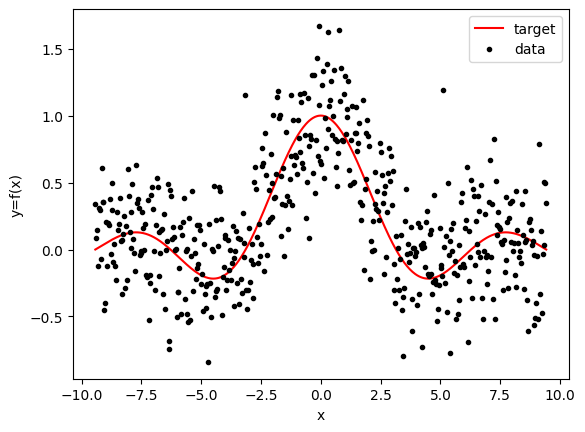

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
N = 500 #número de muestras
X = np.linspace(-3*np.pi,3*np.pi,N) #vector de entrada
y = np.sinc(X/np.pi) #función sinc -> objetivo
var = 0.1 #varianza del ruido
mue = 0 #media del ruido
noise = mue + np.sqrt(var)*np.random.randn(X.shape[0])#ruido blanco
yn = y + noise #señal co ruido
plt.plot(X,y,'r',label='target' )
plt.plot(X,yn,'k.',label='data')
plt.legend()
plt.xlabel('x')
plt.ylabel('y=f(x)')
plt.show()

**Nota:** $${\rm{sinc}}(\theta)=\frac{\sin(\theta)}{\theta}$$

- Se crean los vectores de entrada y salida tipo aprendizaje de máquina.

In [ ]:
ydata = yn.reshape(-1,1)
Xdata = X.reshape(-1,1)
print(Xdata.shape) # N = 500 muestras, P = 1 atributos
print(ydata.shape) # N = 500, regresion univarida

(500, 1)
(500, 1)


- Se entrenará un modelo de aprendizaje con scikitlearn

0
(350, 1)
(150, 1)


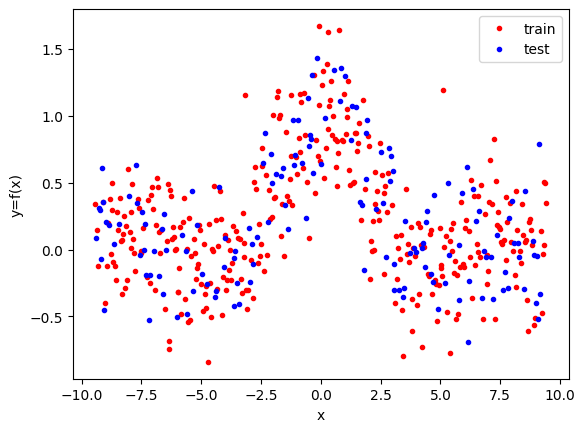

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score, cross_val_predict,ShuffleSplit

#particionar datos
rs = ShuffleSplit(n_splits=1, random_state=0, test_size=0.3)
for i, (train_i, test_i) in enumerate(rs.split(X)):
   print(i)


X_train, X_test, y_train, y_test = Xdata[train_i], Xdata[test_i], ydata[train_i], ydata[test_i]

print(X_train.shape)
print(X_test.shape)

plt.plot(X_train,y_train,'r.',label='train' )
plt.plot(X_test,y_test,'b.',label='test')
plt.legend()
plt.xlabel('x')
plt.ylabel('y=f(x)')
plt.show()

# Kernels y generación de kernels

# Muestreo de Funciones desde Prior y Posterior en Procesos Gaussianos

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


def plot_gpr_samples(gpr_model, X, x, n_samples, ax,xlabel_="x",ylabel_="y"):
    """Plot samples drawn from the Gaussian process model.

    If the Gaussian process model is not trained then the drawn samples are
    drawn from the prior distribution. Otherwise, the samples are drawn from
    the posterior distribution. Be aware that a sample here corresponds to a
    function.

    Parameters
    ----------
    gpr_model : `GaussianProcessRegressor`
        A :class:`~sklearn.gaussian_process.GaussianProcessRegressor` model.
    X: input samples in N x P
    n_samples : int
        The number of samples to draw from the Gaussian process distribution.
    ax : matplotlib axis
        The matplotlib axis where to plot the samples.
    """


    y_mean, y_std = gpr_model.predict(X, return_std=True) #predicted output from gpr
    y_samples = gpr_model.sample_y(X, n_samples)


    for idx, single_prior in enumerate(y_samples.T):
        ax.plot(
            x,
            single_prior,
            linestyle="--",
            alpha=0.7,
            label=f"Sampled function #{idx + 1}",
        )
    ax.plot(x, y_mean, color="black", lw=2)
    ax.fill_between(
        x,
        y_mean - 2*y_std,
        y_mean + 2*y_std,
        alpha=0.2,
        color="black",
        label=r"$\pm$ 2 std. dev.",
    )
    ax.set_xlabel(xlabel_)
    ax.set_ylabel(ylabel_)
    #ax.set_ylim([-3, 3])

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:334: RuntimeWarning: divide by zero encountered in log
  return np.log(np.vstack(bounds))


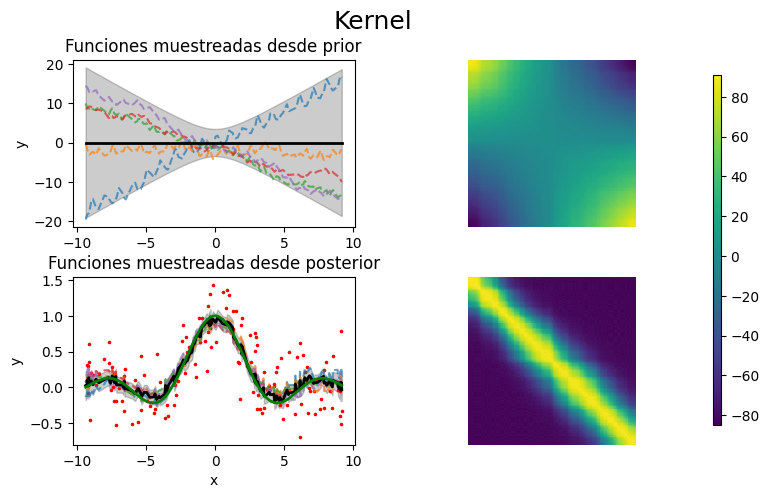

Kernel hiperparametros antes de entrenart:
1**2 * RBF(length_scale=1) + 1**2 * DotProduct(sigma_0=1) + 1**2 * ExpSineSquared(length_scale=1, periodicity=1))


Kernel hiperparametros después de entrenar: 
0.398**2 * RBF(length_scale=2.32) + 0.00415**2 * DotProduct(sigma_0=0.00536) + 0.108**2 * ExpSineSquared(length_scale=2.23, periodicity=0.0855) 
Log-likelihood: -115.882




In [ ]:
#entrenar gpr
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, DotProduct,ExpSineSquared, ConstantKernel
import matplotlib


#organizar datos para graficar
ind_ = np.argsort(X_test,axis=0).reshape(-1)

#definir gpr
alpha = 0.1#*1/np.var(y_train)#1e-5
#kernel
kernel = ConstantKernel(constant_value=1.0, constant_value_bounds=(0.0, 10.0))*RBF(length_scale=1,length_scale_bounds=(1e-1, 10.0))+ConstantKernel(constant_value=1.0, constant_value_bounds=(0.0, 10.0))*DotProduct(sigma_0=1.0, sigma_0_bounds=(1e-05, 100000.0))+ConstantKernel(constant_value=1.0, constant_value_bounds=(0.0, 10.0))*ExpSineSquared(length_scale=1.0, periodicity=1.0, length_scale_bounds=(1e-05, 100000.0), periodicity_bounds=(1e-05, 100000.0))
#crear gpr
gpr = GaussianProcessRegressor(kernel=kernel, alpha=alpha, random_state=0)#crear objeto gpr

fig, axs = plt.subplots(nrows=2,  ncols=2, figsize=(8, 5))

# plot kernel prior
K_prior = kernel(X_test[ind_,0].reshape(-1,1),X_test[ind_,0].reshape(-1,1))
axs[0,1].imshow(K_prior)
axs[0,1].axis('off')

# plot prior
n_samples = 5
plot_gpr_samples(gpr, X_test[ind_,0].reshape(-1,1), X_test[ind_,0].ravel(),
                 n_samples=n_samples, ax=axs[0,0],xlabel_="")
axs[0,0].set_title("Funciones muestreadas desde prior")
#axs[0,0].set_ylim([-2,2])

# plot posterior
gpr.fit(X_train, y_train) #entrenar GPR en train

plot_gpr_samples(gpr,  X_test[ind_,0].reshape(-1,1), X_test[ind_,0].ravel(),
                 n_samples=n_samples, ax=axs[1,0])
axs[1,0].scatter(X_test[ind_, 0], y_test[ind_], color="red",marker='.',s=10)
axs[1,0].plot(X_test[ind_, 0], y[test_i][ind_], color="g",lw=2) #target ytest
axs[1,0].set_title("Funciones muestreadas desde posterior")

# plot kernel posterior después de entrenar
K_posterior = gpr.kernel_(X_test[ind_,0].reshape(-1,1),X_test[ind_,0].reshape(-1,1))
axs[1,1].imshow(K_posterior)
axs[1,1].axis('off')


cax = fig.add_axes([0.925, 0.15, 0.01, 0.7])
norm = matplotlib.colors.Normalize(vmin=min(np.append(K_prior.ravel(),K_posterior.ravel())),
                                   vmax=max(np.append(K_prior.ravel(),K_posterior.ravel())))
sm = plt.cm.ScalarMappable(cmap=None, norm=norm)
#sm.set_array([])
cbar = plt.colorbar(sm,cax=cax)


fig.suptitle("Kernel", fontsize=18)
plt.subplots_adjust(hspace=0.3)
#plt.tight_layout()

plt.show()

print(f"Kernel hiperparametros antes de entrenart:\n{kernel})")
print(
    f"\n\nKernel hiperparametros después de entrenar: \n{gpr.kernel_} \n"
    f"Log-likelihood: {gpr.log_marginal_likelihood(gpr.kernel_.theta):.3f}\n\n"
)


In [ ]:
np.exp(gpr.kernel_.theta)#hiperparametros optimizados por el GPR

array([1.58524861e-01, 2.31505495e+00, 1.72099974e-05, 5.36076877e-03,
       1.15741737e-02, 2.23238336e+00, 8.54601348e-02])

## Para definir otros tipos de kernel ver [Gaussian Process y Kernels](https://scikit-learn.org/stable/modules/gaussian_process.html)

#Ejercicios

- Pruebe otras combinaciones de kernels para entrenar el regresor.

- Estudie la influencia del hiperparámetro alpha en los resultados.

- Entrene un regresor por procesos Gaussianos para la señal del punto 2.3 del [P1_CursoDirigido_Seminario_Pos.pdf](https://github.com/amalvarezme/AprendizajeMaquina/blob/main/Parciales/P1_CursoDirigido_Seminario_Pos.pdf).



## Explicación matemática de las gráficas generadas por el proceso gaussiano

El modelo de regresión de procesos gaussianos (Gaussian Process Regression, GPR) se utiliza para realizar predicciones de manera probabilística. Esto significa que el modelo no solo predice un valor medio, sino también la incertidumbre asociada con esa predicción, expresada en términos de desviación estándar.

### Definición del proceso gaussiano

El proceso gaussiano está definido como un conjunto de variables aleatorias cuya distribución conjunta es gaussiana. El modelo GPR asume que cualquier conjunto finito de puntos de entrada $ \mathbf{X} = \{x_1, x_2, ..., x_n\} $ sigue una distribución gaussiana multivariada:

$$
\mathbf{y} \sim \mathscr{N}(\mathbf{0}, K(\mathbf{X}, \mathbf{X}) + \sigma_n^2 I)
$$

Donde:

- $ \mathbf{y} $ es el vector de valores observados.
- $ K(\mathbf{X}, \mathbf{X}) $ es la matriz de covarianza (también llamada matriz de kernel) calculada entre los puntos de entrada.
- $ \sigma_n^2 $ es la varianza del ruido (controlada por el parámetro `alpha` en el código).
- $ I $ es la matriz identidad.

### Funciones muestreadas desde el *prior*

Antes de entrenar el modelo, las funciones muestreadas provienen del *prior*, que está definido únicamente por el kernel. Estas funciones reflejan las posibles formas que podría tomar el modelo de predicción antes de observar los datos. En este código, se generan varias funciones a partir de la distribución *prior* utilizando la función `sample_y`.

El kernel define la estructura de las funciones muestreadas y está dado por una combinación de varios kernels, como:

1. **Kernel Matern + ExpSineSquared**:
   - El **kernel Matern** es útil para modelar funciones con diferentes niveles de suavidad controlados por el parámetro $ \nu $.
   - El **kernel ExpSineSquared** es adecuado para datos con periodicidad.
   
   En conjunto, este kernel puede modelar datos con comportamientos suaves y periódicos.

2. **Kernel Rational Quadratic + RBF**:
   - El **Rational Quadratic** es un kernel que puede capturar variaciones de escala en los datos.
   - El **RBF kernel** (Radial Basis Function) modela relaciones suaves y continuas.
   
   La combinación de estos kernels permite capturar tanto cambios suaves como variaciones de escala en los datos.

3. **Kernel RBF + DotProduct**:
   - El **DotProduct kernel** modela relaciones lineales en los datos, mientras que el **RBF kernel** captura relaciones no lineales.
   
   Esta combinación es útil cuando los datos contienen tanto relaciones lineales como no lineales.

Las funciones muestreadas desde el *prior* reflejan las posibles formas que podrían tener las funciones subyacentes antes de ver los datos observados.

### Funciones muestreadas desde el *posterior*

Después de ajustar el modelo a los datos de entrenamiento mediante la función `gpr.fit(X_train, y_train)`, el modelo actualiza el *prior* y genera funciones desde el *posterior*. Las funciones muestreadas desde el *posterior* están condicionadas a los datos observados, lo que significa que se ajustan mejor a las observaciones y tienden a pasar cerca de los puntos de datos. Esto se refleja en las funciones graficadas después del ajuste, donde las funciones predichas siguen de cerca los datos observados.

El *posterior* se define como:

$$
p(f_* | \mathbf{X}, \mathbf{y}, \mathbf{x}_*) = \mathscr{N}(\mathbf{m}_*, \mathbf{K}_*)
$$

Donde:

- $ f_* $ es la predicción en el punto $ \mathbf{x}_* $.
- $ \mathbf{m}_* = \mathbf{k}_*^\top (\mathbf{K} + \sigma_n^2 I)^{-1} \mathbf{y} $ es la media condicional.
- $ \mathbf{K}_* = \kappa(\mathbf{x}_*, \mathbf{x}_*) + \sigma_n^2 - \mathbf{k}_*^\top (\mathbf{K} + \sigma_n^2 I)^{-1} \mathbf{k}_* $ es la covarianza condicional.

### Visualización de las matrices de kernel

En las gráficas se visualizan las **matrices de kernel** (o matrices de covarianza) antes y después de entrenar el modelo:

1. **Matriz de kernel antes de entrenar** (Kernel *prior*):
   - Esta matriz se genera utilizando solo la información del kernel sin haber ajustado el modelo a los datos. Cada entrada $ K(x_i, x_j) $ de la matriz representa la similitud entre los puntos $ x_i $ y $ x_j $.

2. **Matriz de kernel después de entrenar** (Kernel *posterior*):
   - Después de entrenar el modelo, la matriz de kernel refleja cómo el modelo ha actualizado las relaciones entre los puntos de datos. Esta matriz suele ajustarse mejor a las observaciones y puede mostrar patrones más definidos en la similitud entre los puntos.

### Log-verosimilitud marginal

El logaritmo de la verosimilitud marginal es un valor que mide qué tan bien se ajusta el modelo a los datos observados. El proceso gaussiano optimiza los hiperparámetros del kernel al maximizar esta cantidad. El valor de la verosimilitud marginal se imprime después de entrenar el modelo, lo que proporciona una métrica de la calidad del ajuste:

$$
\log p(\mathbf{y} | \mathbf{X}) = -\frac{1}{2} \mathbf{y}^\top (\mathbf{K} + \sigma_n^2 I)^{-1} \mathbf{y} - \frac{1}{2} \log |\mathbf{K} + \sigma_n^2 I| - \frac{n}{2} \log 2\pi
$$

### Conclusión

Cada combinación de kernels modela diferentes aspectos de los datos, como suavidad, periodicidad, linealidad o variación de escala. Las gráficas muestran cómo cambian las funciones muestreadas antes y después del ajuste a los datos, reflejando cómo el modelo actualiza sus predicciones en función de las observaciones.

Al observar las matrices de kernel, podemos ver cómo las relaciones entre los puntos de datos cambian antes y después del entrenamiento. Además, el valor de la log-verosimilitud marginal proporciona una métrica para evaluar qué tan bien el modelo se ajusta a los datos.


Probando Kernel 1: Matern + ExpSineSquared


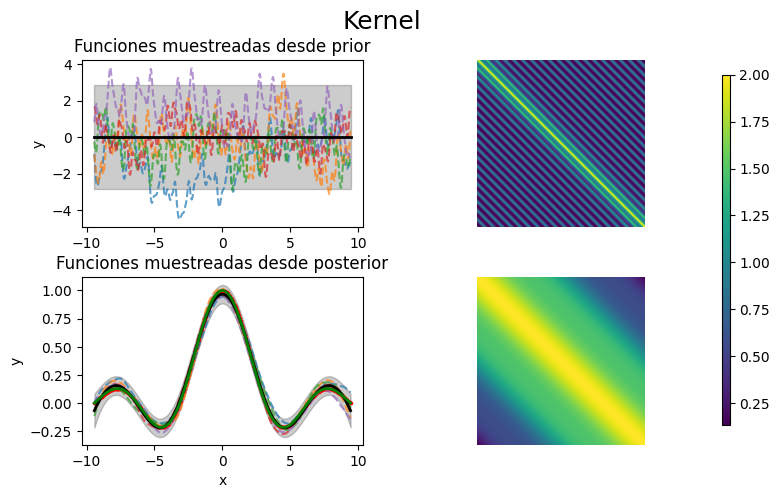

Kernel hiperparámetros antes de entrenar:
Matern(length_scale=1, nu=1.5) + ExpSineSquared(length_scale=1, periodicity=1)


Kernel hiperparámetros después de entrenar:
Matern(length_scale=15.8, nu=1.5) + ExpSineSquared(length_scale=4.87, periodicity=8.2)
Log-likelihood: 91.976


Probando Kernel 2: Rational Quadratic + RBF


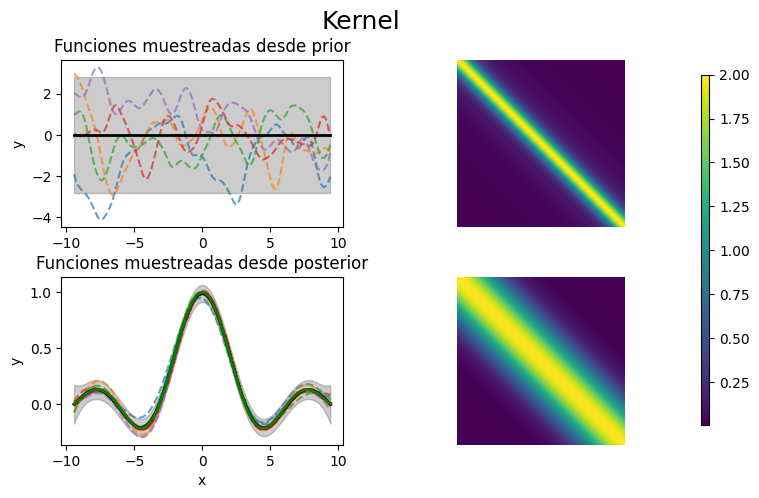

Kernel hiperparámetros antes de entrenar:
RationalQuadratic(alpha=1, length_scale=1) + RBF(length_scale=1)


Kernel hiperparámetros después de entrenar:
RationalQuadratic(alpha=23.9, length_scale=2.08e+04) + RBF(length_scale=3.2)
Log-likelihood: 90.770


Probando Kernel 3: RBF + DotProduct


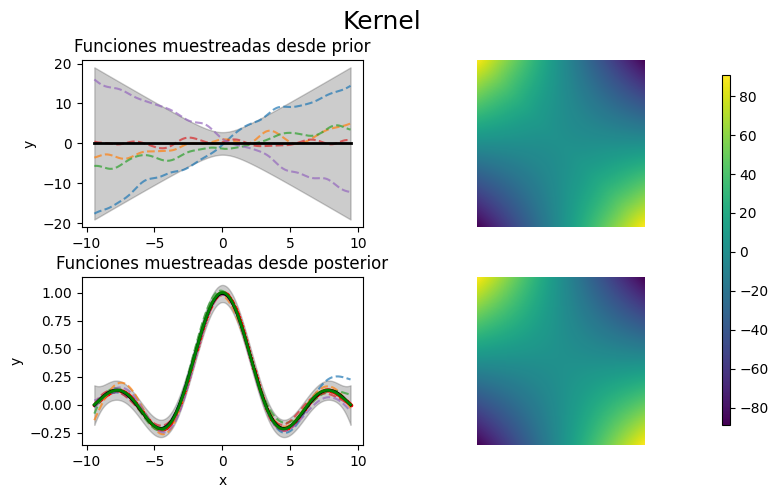

Kernel hiperparámetros antes de entrenar:
RBF(length_scale=1) + DotProduct(sigma_0=1)


Kernel hiperparámetros después de entrenar:
RBF(length_scale=3.2) + DotProduct(sigma_0=0.000302)
Log-likelihood: 88.852




In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, DotProduct, ExpSineSquared, ConstantKernel, Matern, RationalQuadratic
import matplotlib

# Definir la función para probar el modelo GPR con distintos kernels
def entrenar_con_kernels(kernel, X_train, y_train, X_test, y_test, ind_):
    gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.1, random_state=0)

    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 5))

    # Kernel antes de entrenar
    K_prior = kernel(X_test[ind_, 0].reshape(-1, 1), X_test[ind_, 0].reshape(-1, 1))
    axs[0, 1].imshow(K_prior)
    axs[0, 1].axis('off')

    # Funciones muestreadas desde el prior
    plot_gpr_samples(gpr, X_test[ind_, 0].reshape(-1, 1), X_test[ind_, 0].ravel(), n_samples=5, ax=axs[0, 0], xlabel_="")
    axs[0, 0].set_title("Funciones muestreadas desde prior")

    # Entrenar el modelo GPR
    gpr.fit(X_train, y_train)

    # Funciones muestreadas desde el posterior
    plot_gpr_samples(gpr, X_test[ind_, 0].reshape(-1, 1), X_test[ind_, 0].ravel(), n_samples=5, ax=axs[1, 0])
    axs[1, 0].scatter(X_test[ind_, 0], y_test[ind_], color="red", marker='.', s=10)
    axs[1, 0].plot(X_test[ind_, 0], y_test[ind_], color="g", lw=2)  # target y_test
    axs[1, 0].set_title("Funciones muestreadas desde posterior")

    # Kernel posterior después de entrenar
    K_posterior = gpr.kernel_(X_test[ind_, 0].reshape(-1, 1), X_test[ind_, 0].reshape(-1, 1))
    axs[1, 1].imshow(K_posterior)
    axs[1, 1].axis('off')

    # Barra de color para comparar el kernel antes y después
    cax = fig.add_axes([0.925, 0.15, 0.01, 0.7])
    norm = matplotlib.colors.Normalize(vmin=min(np.append(K_prior.ravel(), K_posterior.ravel())),
                                       vmax=max(np.append(K_prior.ravel(), K_posterior.ravel())))
    sm = plt.cm.ScalarMappable(cmap=None, norm=norm)
    cbar = plt.colorbar(sm, cax=cax)

    fig.suptitle("Kernel", fontsize=18)
    plt.subplots_adjust(hspace=0.3)
    plt.show()

    print(f"Kernel hiperparámetros antes de entrenar:\n{kernel}")
    print(f"\n\nKernel hiperparámetros después de entrenar:\n{gpr.kernel_}")
    print(f"Log-likelihood: {gpr.log_marginal_likelihood(gpr.kernel_.theta):.3f}\n\n")


# Probar con diferentes combinaciones de kernels

# Kernel 1: Combinación de Matern y ExpSineSquared
kernel1 = Matern(length_scale=1.0, nu=1.5) + ExpSineSquared(length_scale=1.0, periodicity=1.0)
print("Probando Kernel 1: Matern + ExpSineSquared")
entrenar_con_kernels(kernel1, X_train, y_train, X_test, y_test, ind_)

# Kernel 2: Rational Quadratic y RBF
kernel2 = RationalQuadratic(length_scale=1.0, alpha=1.0) + RBF(length_scale=1.0)
print("Probando Kernel 2: Rational Quadratic + RBF")
entrenar_con_kernels(kernel2, X_train, y_train, X_test, y_test, ind_)

# Kernel 3: Suma de RBF y DotProduct
kernel3 = RBF(length_scale=1.0) + DotProduct(sigma_0=1.0)
print("Probando Kernel 3: RBF + DotProduct")
entrenar_con_kernels(kernel3, X_train, y_train, X_test, y_test, ind_)


En este código, el hiperparámetro $ \alpha $ se especifica como un valor constante en la instancia del modelo **GaussianProcessRegressor**, concretamente con:

$$
gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.1, random_state=0)
$$

### Influencia de $ \alpha $

En el modelo de **Regresión por Procesos Gaussianos (GPR)**, el parámetro $ \alpha $ controla el nivel de ruido que el modelo considera en los datos observados. A continuación se detalla cómo afecta a los resultados en el código proporcionado:

1. **Regularización y suavidad del ajuste**:
   - Un valor de $ \alpha = 0.1 $ indica que el modelo asume que los datos tienen un nivel moderado de ruido. Esto hace que las predicciones del modelo sean más suaves en comparación con un valor de $ \alpha $ menor.
   - Un $ \alpha $ bajo indicaría que el modelo considera que los datos son prácticamente "perfectos", lo que llevaría al modelo a intentar ajustar los datos de manera muy precisa, incluso capturando ruido, lo cual puede resultar en **sobreajuste**.
   - Por otro lado, un valor alto de $ \alpha $ haría que el modelo sea más reacio a ajustarse a los puntos de datos individuales, suavizando las predicciones, lo que podría derivar en un **subajuste**.

2. **Matriz de Kernel y $ \alpha $**:
   En el código, el hiperparámetro $ \alpha $ afecta a la matriz de kernel calculada durante el ajuste. La matriz posterior del kernel, que se visualiza en la sección:

$$
K_{\text{posterior}} = gpr.kernel_(X_{\text{test}}[ind_, 0].reshape(-1, 1), X_{\text{test}}[ind_, 0].reshape(-1, 1))
$$

   refleja cómo el valor de $ \alpha $ afecta al ajuste. Cuanto mayor sea $ \alpha $, mayor será el impacto en la diagonal de la matriz de covarianza, lo que esencialmente reduce la importancia de los puntos individuales y crea una función de predicción más suave.

3. **Log-marginal likelihood**:
   El logaritmo de la verosimilitud marginal se calcula con:

$$
\log p(\mathbf{y}|\theta) = gpr.log_marginal_likelihood(gpr.kernel_.theta)
$$

   Este valor nos proporciona una medida de qué tan bien se ajusta el modelo a los datos, considerando el nivel de ruido especificado por $ \alpha $. El modelo optimiza este valor para encontrar el balance adecuado entre el ajuste a los datos y la regularización impuesta por el ruido. En general:
   - Un log-likelihood bajo podría indicar que el modelo está subajustado, posiblemente porque $ \alpha $ es demasiado grande.
   - Un log-likelihood muy alto podría sugerir un sobreajuste si $ \alpha $ es demasiado pequeño.

### Visualización de $ \alpha $ en las Gráficas

En las gráficas que se generan:

1. **Funciones muestreadas desde el prior**:
   Las funciones muestreadas antes de ajustar el modelo muestran cómo el modelo considera que debería ser la función antes de observar los datos. Estas funciones son generadas únicamente en función del kernel, y la influencia de $ \alpha $ es mínima en este caso.

2. **Funciones muestreadas desde el posterior**:
   Una vez que se ajusta el modelo con los datos de entrenamiento y $ \alpha $, el posterior refleja cómo el modelo balancea la suavidad y el ajuste. Si $ \alpha $ es bajo, las funciones ajustadas al posterior podrían seguir más de cerca los puntos de datos, mientras que si $ \alpha $ es alto, el ajuste será más suave.

El hiperparámetro $ \alpha $ controla cuánto ruido se asume en los datos y, por lo tanto, influye directamente en el ajuste del modelo. Un valor de $ \alpha $ demasiado bajo llevará al modelo a seguir de cerca el ruido en los datos, mientras que un valor demasiado alto hará que el modelo ignore patrones más finos en los datos.


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k2__k2__alpha is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


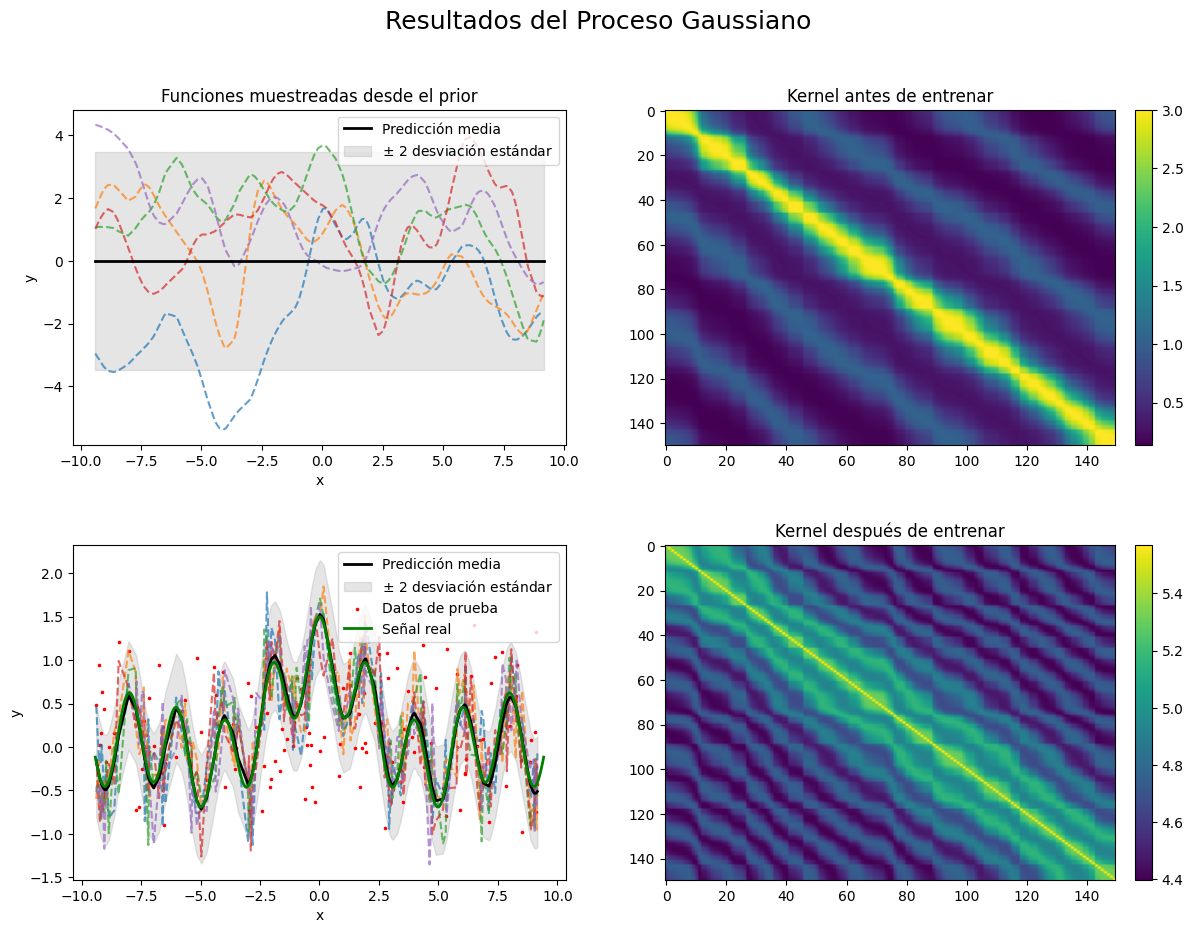

Kernel hiperparámetros antes de entrenar:
1**2 * RBF(length_scale=1) + 1**2 * RationalQuadratic(alpha=1, length_scale=1) + 1**2 * ExpSineSquared(length_scale=1, periodicity=6.28) + WhiteKernel(noise_level=1e-05)

Kernel hiperparámetros después de entrenar:
0.753**2 * RBF(length_scale=2.48) + 0.316**2 * RationalQuadratic(alpha=1e-05, length_scale=0.329) + 2.16**2 * ExpSineSquared(length_scale=5.04, periodicity=2) + WhiteKernel(noise_level=0.251)
Log-marginal likelihood: -279.227



In [35]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, ConstantKernel, ExpSineSquared, RationalQuadratic
from sklearn.model_selection import ShuffleSplit

# Generar la señal con ruido
def generar_senal(x, A, B, SNR_db):
    ruido_std = np.sqrt(10 ** (-SNR_db / 10))
    senal = A * np.sinc(x / np.pi) + B * np.cos(2 * np.pi * 0.5 * x)
    ruido = ruido_std * np.random.randn(len(x))
    return senal + ruido

# Función para graficar muestras generadas por el modelo GPR
def plot_gpr_samples(gpr_model, X, x, n_samples, ax, xlabel_="x", ylabel_="y", title_=""):
    y_mean, y_std = gpr_model.predict(X, return_std=True)
    y_samples = gpr_model.sample_y(X, n_samples)

    for idx, single_prior in enumerate(y_samples.T):
        ax.plot(x, single_prior, linestyle="--", alpha=0.7)

    ax.plot(x, y_mean, color="black", lw=2, label="Predicción media")
    ax.fill_between(x, y_mean - 2 * y_std, y_mean + 2 * y_std, alpha=0.2, color="gray", label=r"$\pm$ 2 desviación estándar")
    ax.set_xlabel(xlabel_)
    ax.set_ylabel(ylabel_)
    ax.set_title(title_)
    ax.legend(loc="upper right")

# Definir parámetros de la señal
A = 1.0
B = 0.5
SNR_db = 10  # Aumentar SNR para reducir el ruido

# Generar datos
np.random.seed(42)
N = 500
X = np.linspace(-3 * np.pi, 3 * np.pi, N)
yn = generar_senal(X, A, B, SNR_db)

# Generar la señal original sin ruido para comparar
y_true = A * np.sinc(X / np.pi) + B * np.cos(2 * np.pi * 0.5 * X)

# Preparar datos para GPR
ydata = yn.reshape(-1, 1)
Xdata = X.reshape(-1, 1)

# Particionar datos
rs = ShuffleSplit(n_splits=1, random_state=0, test_size=0.3)
for train_i, test_i in rs.split(Xdata):
    X_train, X_test = Xdata[train_i], Xdata[test_i]
    y_train, y_test = ydata[train_i], ydata[test_i]

# Organizar datos para graficar
ind_ = np.argsort(X_test, axis=0).reshape(-1)

# Definir GPR con kernel ajustado
kernel = (
    ConstantKernel(1.0) * RBF(length_scale=1.0, length_scale_bounds=(1e-1, 10.0)) +
    ConstantKernel(1.0) * RationalQuadratic(length_scale=1.0, alpha=1.0, length_scale_bounds=(1e-1, 10.0)) +
    ConstantKernel(1.0) * ExpSineSquared(length_scale=1.0, periodicity=6.28,
                                         length_scale_bounds=(1e-1, 10.0), periodicity_bounds=(1.0, 10.0)) +
    WhiteKernel(noise_level=1e-5, noise_level_bounds=(1e-5, 1e1))
)

# Crear GPR
gpr = GaussianProcessRegressor(kernel=kernel, alpha=1e-5, random_state=0, n_restarts_optimizer=10, normalize_y=True)

# Graficar resultados
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Plot kernel prior
K_prior = kernel(X_test[ind_, 0].reshape(-1, 1))
im_prior = axs[0, 1].imshow(K_prior, aspect='auto')
axs[0, 1].set_title("Kernel antes de entrenar")
plt.colorbar(im_prior, ax=axs[0, 1], fraction=0.046, pad=0.04)

# Plot prior
n_samples = 5
plot_gpr_samples(gpr, X_test[ind_, 0].reshape(-1, 1), X_test[ind_, 0].ravel(), n_samples=n_samples, ax=axs[0, 0], title_="Funciones muestreadas desde el prior")

# Entrenar GPR
gpr.fit(X_train, y_train)

# Plot posterior
plot_gpr_samples(gpr, X_test[ind_, 0].reshape(-1, 1), X_test[ind_, 0].ravel(), n_samples=n_samples, ax=axs[1, 0])
axs[1, 0].scatter(X_test[ind_, 0], y_test, color="red", marker='.', s=10, label="Datos de prueba")
axs[1, 0].plot(X, y_true, color="green", lw=2, label="Señal real")
axs[1, 0].legend(loc="upper right")

# Plot kernel posterior después de entrenar
K_posterior = gpr.kernel_(X_test[ind_, 0].reshape(-1, 1))
im_posterior = axs[1, 1].imshow(K_posterior, aspect='auto')
axs[1, 1].set_title("Kernel después de entrenar")
plt.colorbar(im_posterior, ax=axs[1, 1], fraction=0.046, pad=0.04)

fig.suptitle("Resultados del Proceso Gaussiano", fontsize=18)
plt.subplots_adjust(hspace=0.3, wspace=0.2)

# Mostrar la gráfica
plt.show()

# Imprimir hiperparámetros y log-marginal likelihood
print(f"Kernel hiperparámetros antes de entrenar:\n{kernel}")
print(f"\nKernel hiperparámetros después de entrenar:\n{gpr.kernel_}")
print(f"Log-marginal likelihood: {gpr.log_marginal_likelihood(gpr.kernel_.theta):.3f}\n")
